In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0, 0.5, 'Count')

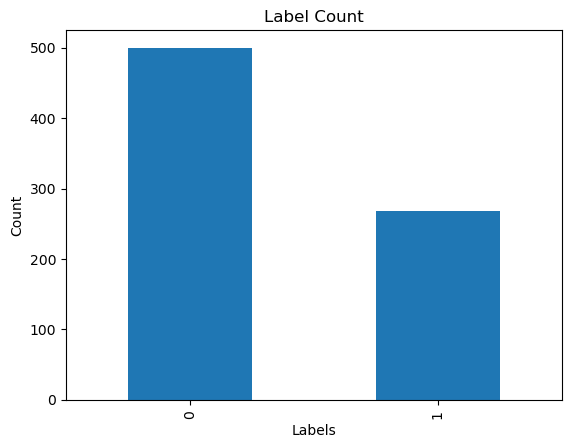

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Outcome'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [6]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 인코딩

In [12]:
X = df.drop('Outcome', axis=1).values

In [16]:
y = df['Outcome'].values

In [18]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [22]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# CNN을 위해 차원을 3차원으로 확장
X_scaled = np.expand_dims(X_scaled, axis=2)

In [26]:
print(X_scaled)

[[[0.35294118]
  [0.74371859]
  [0.59016393]
  ...
  [0.50074516]
  [0.23441503]
  [0.48333333]]

 [[0.05882353]
  [0.42713568]
  [0.54098361]
  ...
  [0.39642325]
  [0.11656704]
  [0.16666667]]

 [[0.47058824]
  [0.91959799]
  [0.52459016]
  ...
  [0.34724292]
  [0.25362938]
  [0.18333333]]

 ...

 [[0.29411765]
  [0.6080402 ]
  [0.59016393]
  ...
  [0.390462  ]
  [0.07130658]
  [0.15      ]]

 [[0.05882353]
  [0.63316583]
  [0.49180328]
  ...
  [0.4485842 ]
  [0.11571307]
  [0.43333333]]

 [[0.05882353]
  [0.46733668]
  [0.57377049]
  ...
  [0.45305514]
  [0.10119556]
  [0.03333333]]]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# CNN 모델 구성
model = Sequential()
# 타임스텝=3, 특성=10
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))  
model.add(MaxPooling1D(pool_size=2))  # MaxPooling 레이어 추가 pool_size=2: 데이터 크기를 절반으로 줄이며, 각 두 개의 포인트 중 최대값을 선택하여 차원 축소 및 계산 효율성을 높임
model.add(Dropout(0.2))  # Dropout 레이어 추가

# 두 번째 Conv1D 레이어
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))  
model.add(MaxPooling1D(pool_size=2))  # MaxPooling 레이어 추가
model.add(Dropout(0.2))  # Dropout 레이어 추가

model.add(Flatten())  # Flatten 레이어 추가하여 출력형태를 변환 -> Dense 레이어와 연결하기 위해 필요
model.add(Dense(64, activation='relu'))  # Fully Connected Layer
model.add(Dropout(0.5))  # Dropout 레이어 추가

model.add(Dense(32, activation='relu'))  # Fully Connected Layer
model.add(Dropout(0.5))  # Dropout 레이어 추가

model.add(Dense(1, activation='sigmoid'))  # 출력층(1):이진 분류를 위한 sigmoid

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\82107\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,True
1,"<MaxPooling1D name=max_pooling1d, built=True>",max_pooling1d,True
2,"<Dropout name=dropout, built=True>",dropout,True
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,True
4,"<MaxPooling1D name=max_pooling1d_1, built=True>",max_pooling1d_1,True
5,"<Dropout name=dropout_1, built=True>",dropout_1,True
6,"<Flatten name=flatten, built=True>",flatten,True
7,"<Dense name=dense, built=True>",dense,True
8,"<Dropout name=dropout_2, built=True>",dropout_2,True
9,"<Dense name=dense_1, built=True>",dense_1,True


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=80, batch_size=64, validation_split=0.1)

Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4383 - loss: 0.6981 - val_accuracy: 0.5968 - val_loss: 0.6867
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6296 - loss: 0.6818 - val_accuracy: 0.5968 - val_loss: 0.6820
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6621 - loss: 0.6723 - val_accuracy: 0.5968 - val_loss: 0.6783
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6581 - loss: 0.6664 - val_accuracy: 0.5968 - val_loss: 0.6775
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6534 - loss: 0.6621 - val_accuracy: 0.5968 - val_loss: 0.6781
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6739 - loss: 0.6477 - val_accuracy: 0.5968 - val_loss: 0.6778
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6540 - loss: 0.6604 - val_accuracy: 0.5968 - val_loss: 0.6756
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6692 - loss: 0.6419 - val_accuracy: 0.5968 - val_loss: 0.6757


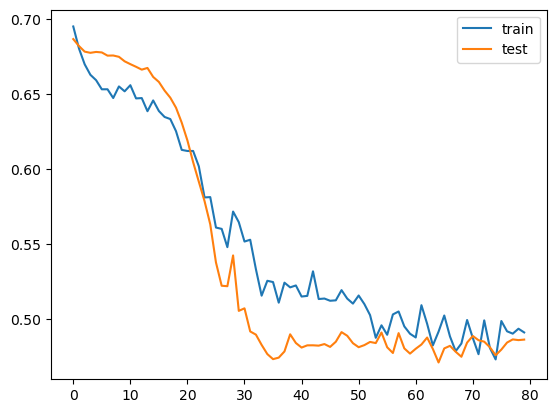

In [38]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [40]:
model.evaluate(X_train, y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.4690


[0.4534590542316437, 0.7654722929000854]

In [42]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7316 - loss: 0.5067 


[0.5166410803794861, 0.7402597665786743]

In [44]:
model_file='./CNN_diabetes.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)

## 전이학습

In [47]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [49]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,True
1,"<MaxPooling1D name=max_pooling1d, built=True>",max_pooling1d,True
2,"<Dropout name=dropout, built=True>",dropout,True
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,True
4,"<MaxPooling1D name=max_pooling1d_1, built=True>",max_pooling1d_1,True
5,"<Dropout name=dropout_1, built=True>",dropout_1,True
6,"<Flatten name=flatten, built=True>",flatten,True
7,"<Dense name=dense, built=True>",dense,True
8,"<Dropout name=dropout_2, built=True>",dropout_2,True
9,"<Dense name=dense_1, built=True>",dense_1,True


In [51]:
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
base_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.5067  


[0.5166410803794861, 0.7402597665786743]

In [53]:
# 동결 (학습 중지)
base_model.trainable = False

In [55]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,False
1,"<MaxPooling1D name=max_pooling1d, built=True>",max_pooling1d,False
2,"<Dropout name=dropout, built=True>",dropout,False
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,False
4,"<MaxPooling1D name=max_pooling1d_1, built=True>",max_pooling1d_1,False
5,"<Dropout name=dropout_1, built=True>",dropout_1,False
6,"<Flatten name=flatten, built=True>",flatten,False
7,"<Dense name=dense, built=True>",dense,False
8,"<Dropout name=dropout_2, built=True>",dropout_2,False
9,"<Dense name=dense_1, built=True>",dense_1,False


In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
#출력층 삭제
def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

In [59]:
#레이어 추가
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(1, activation='sigmoid'))
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,512 (33.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,512 (33.25 KB)

In [61]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,False
1,"<MaxPooling1D name=max_pooling1d, built=True>",max_pooling1d,False
2,"<Dropout name=dropout, built=True>",dropout,False
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,False
4,"<MaxPooling1D name=max_pooling1d_1, built=True>",max_pooling1d_1,False
5,"<Dropout name=dropout_1, built=True>",dropout_1,False
6,"<Flatten name=flatten, built=True>",flatten,False
7,"<Dense name=dense, built=True>",dense,False
8,"<Dropout name=dropout_2, built=True>",dropout_2,False
9,"<Dense name=dense_1, built=True>",dense_1,False


In [63]:
history2 = new_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)
new_model.summary()

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4313 - loss: 0.7805 - val_accuracy: 0.7742 - val_loss: 0.6584
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5734 - loss: 0.6609 - val_accuracy: 0.7742 - val_loss: 0.6042
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6446 - loss: 0.6122 - val_accuracy: 0.7581 - val_loss: 0.5700
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6730 - loss: 0.5861 - val_accuracy: 0.7581 - val_loss: 0.5472
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7340 - loss: 0.5374 - val_accuracy: 0.7581 - val_loss: 0.5323
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7380 - loss: 0.5232 - val_accuracy: 0.7581 - val_loss: 0.5198
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7405 - loss: 0.5350 - val_accuracy: 0.7742 - val_loss: 0.5107
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6989 - loss: 0.5425 - val_accuracy: 0.7742 - val_loss

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,781 (46.02 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 8,512 (33.25 KB)

 Optimizer params: 2,180 (8.52 KB)

In [65]:
new_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.5097 


[0.5194248557090759, 0.7467532753944397]

### 미세조정

In [68]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [70]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Conv1D name=conv1d, built=True>",conv1d,True
1,"<MaxPooling1D name=max_pooling1d, built=True>",max_pooling1d,True
2,"<Dropout name=dropout, built=True>",dropout,True
3,"<Conv1D name=conv1d_1, built=True>",conv1d_1,True
4,"<MaxPooling1D name=max_pooling1d_1, built=True>",max_pooling1d_1,True
5,"<Dropout name=dropout_1, built=True>",dropout_1,True
6,"<Flatten name=flatten, built=True>",flatten,True
7,"<Dense name=dense, built=True>",dense,True
8,"<Dropout name=dropout_2, built=True>",dropout_2,True
9,"<Dense name=dense_1, built=True>",dense_1,True


In [76]:
history2 = new_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)
new_model.summary()

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7832 - loss: 0.4733 - val_accuracy: 0.7258 - val_loss: 0.4995
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7775 - loss: 0.4839 - val_accuracy: 0.7581 - val_loss: 0.4892
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7833 - loss: 0.4686 - val_accuracy: 0.7419 - val_loss: 0.5031
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7265 - loss: 0.4943 - val_accuracy: 0.7097 - val_loss: 0.5245
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7684 - loss: 0.4679 - val_accuracy: 0.7742 - val_loss: 0.5002
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7813 - loss: 0.4801 - val_accuracy: 0.7419 - val_loss: 0.4950
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7407 - loss: 0.5386 - val_accuracy: 0.7258 - val_loss: 0.4948
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7413 - loss: 0.5054 - val_accuracy: 0.7419 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,805 (112.52 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,204 (75.02 KB)

In [78]:
new_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7454 - loss: 0.5128 


[0.5173250436782837, 0.7532467246055603]